In [142]:
# Import some libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [143]:
###

file_path = '15213_building_coords'

###

file = open(file_path + '.csv')

coords = pd.read_csv(file, sep = ',', header = 'infer')

file.close()

In [144]:
coords

,x,y
0,-79.971842,40.438767
1,-79.968957,40.438535
2,-79.969801,40.441180
3,-79.965809,40.439143
4,-79.968394,40.439994
...,...,...
3796,-79.950181,40.450273
3797,-79.948124,40.446749
3798,-79.932882,40.432834
3799,-79.954626,40.460117


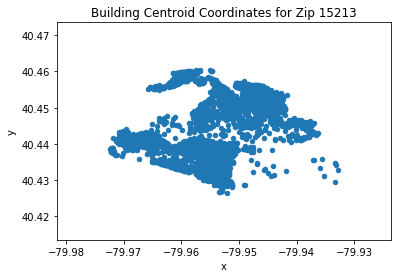

In [145]:
coords.plot.scatter(x = 'x', y = 'y', title = 'Building Centroid Coordinates for Zip 15213')

In [146]:
# Setting the radius in which buildings are checked for (in terms of coords)

r = 0.01

# Setting the number of dr steps to check

dr = r/50

# Setting the origin of our circle

x_center = -79.9487
y_center = 40.45

# Set up a dist function

def dist(x1, y1, x2, y2):
    
    dist = ((x1 - x2)**2 + (y1 - y2)**2)**(1/2)
    
    return(dist)

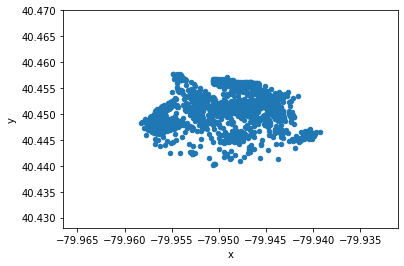

In [147]:
# Find all of the points that lie within our circle of interest

rdf_points = pd.DataFrame()

for index, data in coords.iterrows():
    
    x = data['x']
    y = data['y']
    
    if dist(x, y, x_center, y_center) <= r:
        
        rdf_points = rdf_points.append(data)
        
rdf_points.plot.scatter(x = 'x', y = 'y')

In [148]:
# Find the average density of points

def areaOfCircle(r):
    
    return(np.pi * r**2)

row, col = rdf_points.shape

rho = row/areaOfCircle(r)

rho

3682845.3831464583

In [149]:
# Now we need to implement our function

outer_r = dr
inner_r = 0

distribution = pd.DataFrame()

counter = 0

while outer_r < r:
    
    in_radius = []

    for row, data in rdf_points.iterrows():
        
        x = data['x']
        
        y = data['y']
        
        d = dist(x, y, x_center, y_center)
        
        if d < outer_r and d > inner_r:

            in_radius.append(row)
            
            counter += 1

    # Normalize the number
    
    area = areaOfCircle(outer_r) - areaOfCircle(inner_r)
    
    normal = counter/(area * rho)
    
    distribution = distribution.append([[outer_r, normal]])
    
    rdf_points = rdf_points.drop(in_radius)
    
    inner_r = outer_r
    
    outer_r += dr
    
    counter = 0

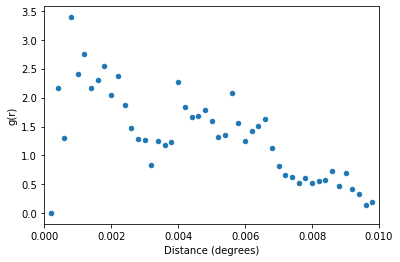

In [150]:
distribution.columns = ['Distance (degrees)', 'g(r)']

distribution.plot.scatter(x = 0, y = 1, xlim = [0, 0.01])

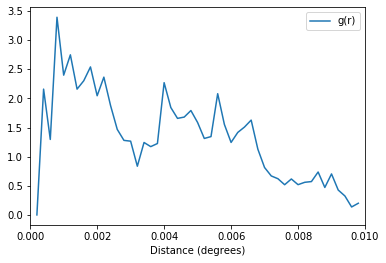

In [151]:
distribution.plot.line(x = 'Distance (degrees)', y = 'g(r)', xlim = [0, 0.01])